In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

regression_data = pd.read_csv('house_prices_dataset_dirty.csv')



In [6]:
regression_data.head()

,house_id,area_sqft,bedrooms,bathrooms,location,year_built,parking,price
0,1,1460,3,1.0,D,2019,Yes,3.239631e+06
1,2,4372,1,4.0,A,1982,No,9.539466e+06
2,3,3692,3,4.0,B,2008,No,8.023577e+06
3,4,1066,2,3.0,C,2020,No,2.507596e+06
4,5,4044,4,4.0,A,2008,Yes,9.332301e+06


In [5]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_id    1005 non-null   int64  
 1   area_sqft   1005 non-null   int64  
 2   bedrooms    1005 non-null   int64  
 3   bathrooms   975 non-null    float64
 4   location    1005 non-null   object 
 5   year_built  1005 non-null   int64  
 6   parking     975 non-null    object 
 7   price       1005 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 62.9+ KB


In [4]:
regression_data.isnull().sum()

house_id       0
area_sqft      0
bedrooms       0
bathrooms     30
location       0
year_built     0
parking       30
price          0
dtype: int64

In [3]:
regression_data.duplicated().sum()
show_duplicates = regression_data[regression_data.duplicated()]
show_duplicates

,house_id,area_sqft,bedrooms,bathrooms,location,year_built,parking,price
1000,522,1267,1,3.0,D,2018,No,2.841770e+06
1001,738,920,3,4.0,A,1997,Yes,2.890613e+06
1002,741,3432,5,1.0,D,1987,No,7.681112e+06
1003,661,1313,5,2.0,C,2021,No,3.778608e+06
1004,412,2743,2,3.0,D,1987,Yes,6.334226e+06


In [6]:
regression_data.drop_duplicates()

,house_id,area_sqft,bedrooms,bathrooms,location,year_built,parking,price
0,1,1460,3,1.0,D,2019,Yes,3.239631e+06
1,2,4372,1,4.0,A,1982,No,9.539466e+06
2,3,3692,3,4.0,B,2008,No,8.023577e+06
3,4,1066,2,3.0,C,2020,No,2.507596e+06
4,5,4044,4,4.0,A,2008,Yes,9.332301e+06
...,...,...,...,...,...,...,...,...
995,996,640,5,2.0,D,2015,Yes,2.235843e+06
996,997,2681,1,1.0,A,2005,No,5.682474e+06
997,998,2222,4,4.0,B,1990,Yes,5.344440e+06
998,999,941,3,1.0,C,1987,No,2.205085e+06


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
regression_data['location'] = le.fit_transform(regression_data['location'])
regression_data1 = pd.get_dummies(regression_data ,columns=['parking'])
regression_data1


,house_id,area_sqft,bedrooms,bathrooms,location,year_built,price,parking_No,parking_Yes
0,1,1460,3,1.0,3,2019,3.239631e+06,False,True
1,2,4372,1,4.0,0,1982,9.539466e+06,True,False
2,3,3692,3,4.0,1,2008,8.023577e+06,True,False
3,4,1066,2,3.0,2,2020,2.507596e+06,True,False
4,5,4044,4,4.0,0,2008,9.332301e+06,False,True
...,...,...,...,...,...,...,...,...,...
1000,522,1267,1,3.0,3,2018,2.841770e+06,True,False
1001,738,920,3,4.0,0,1997,2.890613e+06,False,True
1002,741,3432,5,1.0,3,1987,7.681112e+06,True,False
1003,661,1313,5,2.0,2,2021,3.778608e+06,True,False


In [18]:
regression_data.head()
regression_data['bathrooms'].fillna(regression_data['bathrooms'].mode()[0], inplace=True)
regression_data1


C:\Users\shruti\AppData\Local\Temp\ipykernel_22908\1044418820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  regression_data['bathrooms'].fillna(regression_data['bathrooms'].mode()[0], inplace=True)


,house_id,area_sqft,bedrooms,bathrooms,location,year_built,price,parking_No,parking_Yes
0,1,1460,3,1.0,3,2019,3.239631e+06,False,True
1,2,4372,1,4.0,0,1982,9.539466e+06,True,False
2,3,3692,3,4.0,1,2008,8.023577e+06,True,False
3,4,1066,2,3.0,2,2020,2.507596e+06,True,False
4,5,4044,4,4.0,0,2008,9.332301e+06,False,True
...,...,...,...,...,...,...,...,...,...
1000,522,1267,1,3.0,3,2018,2.841770e+06,True,False
1001,738,920,3,4.0,0,1997,2.890613e+06,False,True
1002,741,3432,5,1.0,3,1987,7.681112e+06,True,False
1003,661,1313,5,2.0,2,2021,3.778608e+06,True,False


In [21]:
regression_data1.isnull().sum()

house_id       0
area_sqft      0
bedrooms       0
bathrooms      0
location       0
year_built     0
price          0
parking_No     0
parking_Yes    0
dtype: int64

In [22]:
regression_data1.corr()

,house_id,area_sqft,bedrooms,bathrooms,location,year_built,price,parking_No,parking_Yes
house_id,1.000000,0.012091,0.017416,0.027187,0.025243,-0.016370,0.028755,-0.028057,0.029202
area_sqft,0.012091,1.000000,0.059425,-0.020607,0.051856,-0.012209,0.722943,-0.011025,0.005769
bedrooms,0.017416,0.059425,1.000000,0.054670,0.053057,0.035888,0.106471,-0.024502,0.031576
bathrooms,0.027187,-0.020607,0.054670,1.000000,0.064796,0.003146,-0.001381,0.034519,-0.025049
location,0.025243,0.051856,0.053057,0.064796,1.000000,0.028863,0.009991,0.015815,-0.024030
year_built,-0.016370,-0.012209,0.035888,0.003146,0.028863,1.000000,0.017600,0.069935,-0.066614
price,0.028755,0.722943,0.106471,-0.001381,0.009991,0.017600,1.000000,-0.067901,0.056223
parking_No,-0.028057,-0.011025,-0.024502,0.034519,0.015815,0.069935,-0.067901,1.000000,-0.942016
parking_Yes,0.029202,0.005769,0.031576,-0.025049,-0.024030,-0.066614,0.056223,-0.942016,1.000000


<Axes: >

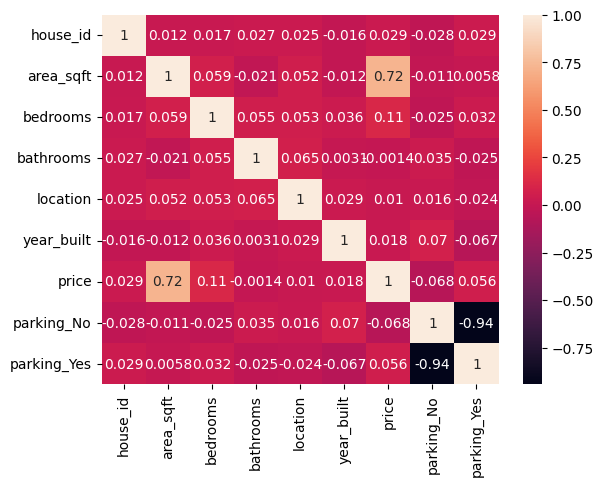

In [23]:
sns.heatmap(regression_data1.corr(),annot=  True)

<Axes: xlabel='area_sqft'>

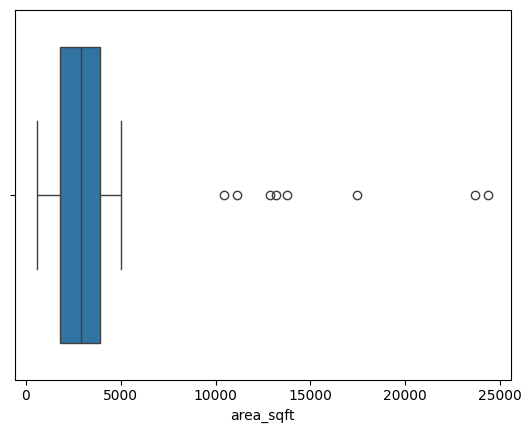

In [27]:
sns.boxplot(x='area_sqft', data=regression_data1)

In [50]:
# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score , mean_absolute_error, accuracy_score

In [45]:
X= regression_data1[['area_sqft','bedrooms','bathrooms','location']]
y=regression_data1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models={
    "linearregression":LinearRegression(),
    "decisiontree":DecisionTreeRegressor(),
    "randomforest":RandomForestRegressor()
}

In [55]:
for name,model in models.items():
 model.fit(X_train,y_train)
 y_pred=model.predict(X_test)
 rmse=mean_squared_error(y_test,y_pred)
 print(rmse)
 

7692279240424.137
706344611106.0154
722477268605.5306


In [ ]:
r2= r2_score(y_test,y_pred)
r2

0.88929599938577

In [ ]:
err= y_pred-y_test
err

926     47425.059332
630    -89792.659836
682   -160742.323236
514   -184705.246359
365    251897.974204
           ...      
208    224089.009160
778     40418.106772
334    301809.722379
210   -216829.615519
350    256145.370163
Name: price, Length: 201, dtype: float64

In [66]:

results = {
    'Metric': ['MSE', 'R2'],
    'Value': [mean_squared_error(y_test, y_pred), r2]
}

df = pd.DataFrame(results)
df.to_csv("model_results.csv", index=False)

print("✅ Results saved to model_results.csv")

✅ Results saved to model_results.csv
